Acquired data form:<br>
weather: https://www.kaggle.com/datasets/ananthr1/weather-prediction<br>

<hr>Pull in the data sets<hr>

In [1]:
import pandas as pd
#import the csv files
weather = pd.read_csv("seattle-weather.csv")

weather["date"] = pd.to_datetime(weather["date"])

#convert weather field into numerical values
weather_mapping = {'drizzle': 0, 'rain': 1, 'sun': 2, 'snow': 3, 'fog': 4}
weather["weather"] = weather["weather"].map(weather_mapping)


#look at data info
print(weather.keys())

weather.info()

print(weather.head())
print(weather.tail())

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.6 KB
        date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7        0
1 2012-01-02           10.9      10.6       2.8   4.5        1
2 2012-01-03            0.8      11.7       7.2   2.3        1
3 2012-01-04           20.3      12.2       5.6   4.7        1
4 2012-01

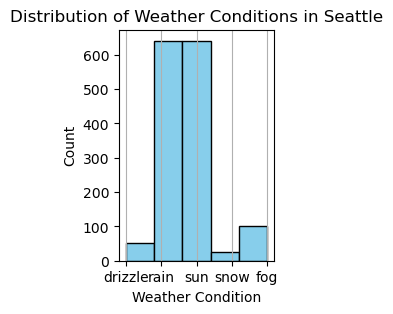

In [10]:
#This was added on 4/18/2024. Nothing else in the notebook was changed
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 3))
weather['weather'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Weather Conditions in Seattle')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(range(5), weather_mapping.keys())
plt.grid(axis='y')
plt.show()

<hr>Discover interesting relations<hr>
Ideally, I would like to be able to predict the weather based on the climate conditions that day. <br>

               temp_max  precipitation  temp_min      wind   weather
temp_max       1.000000      -0.228555  0.875687 -0.164857  0.187914
precipitation -0.228555       1.000000 -0.072684  0.328045 -0.284729
temp_min       0.875687      -0.072684  1.000000 -0.074185  0.042638
wind          -0.164857       0.328045 -0.074185  1.000000 -0.167683
weather        0.187914      -0.284729  0.042638 -0.167683  1.000000


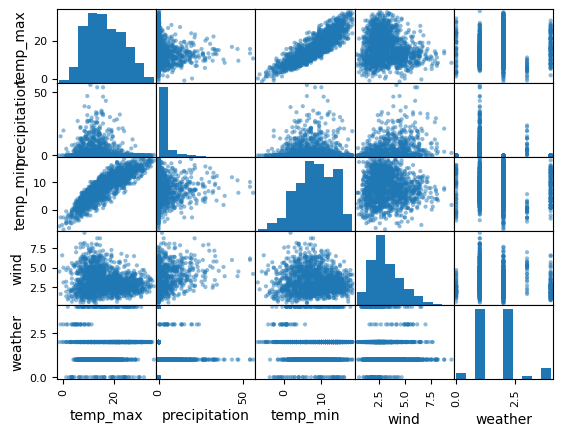

In [2]:
from pandas.plotting import scatter_matrix
#what we want to look at
compare = ["temp_max","precipitation","temp_min","wind", "weather"]
#graph
scatter_matrix(weather[compare])

#find and print correlations
corr = weather[compare].corr()
print(corr) 

temp_max, precipitation, and wind seem to have a small correlation with weather. 

<hr>Cleaning the data<hr>


In [3]:
weather.dropna()
weather.drop(columns=["date"])

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,1
1457,1.5,5.0,1.7,1.3,1
1458,0.0,7.2,0.6,2.6,4
1459,0.0,5.6,-1.0,3.4,2


<hr>Create training/test sets<hr>

In [5]:
#changed to sklearn way because its so much easier
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(weather,test_size=0.2,random_state=123)

print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

1168 293
          date  precipitation  temp_max  temp_min  wind  weather
580 2013-08-03            0.0      25.0      15.6   2.4        4
961 2014-08-19            0.0      27.2      15.6   2.4        2
78  2012-03-19            2.0       7.2      -1.1   3.0        1
5   2012-01-06            2.5       4.4       2.2   2.2        1
793 2014-03-04           16.5      13.9       7.8   3.9        1
           date  precipitation  temp_max  temp_min  wind  weather
147  2012-05-27            0.0      17.2      11.7   3.7        2
676  2013-11-07           30.0      11.1      10.0   7.2        1
1240 2015-05-25            0.0      15.6      11.1   2.7        2
1373 2015-10-05            0.0      23.3       9.4   1.6        2
1249 2015-06-03            0.0      20.0      11.7   3.0        2
